This notebook demonstrates how to get the output and visualize it for the screen embedding model trained in the notebook `(Bonus) Train Screen Similarity`

In [31]:
import os 

import torch
import torch.nn.functional as F
from PIL import Image, ImageDraw
from torchvision import transforms

from screensim.ui_models import *

In [6]:
CHECKPOINTS_DIR = "./downloads/checkpoints/"
MODEL_CHECKPOINT = "screensim-resnet-web350k.ckpt"

### Helper Functions

In [7]:
def loadModel(): 
    model_path = os.path.join(CHECKPOINTS_DIR,  MODEL_CHECKPOINT)
    m = UIScreenEmbedder.load_from_checkpoint(model_path).eval()
    return m

In [8]:
def getPredictionsForImage(model, image): 
    img_input = image
    if not torch.is_tensor(image):
        img_transforms = transforms.Compose([
            transforms.Resize((256, 128)),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
        img_input = img_transforms(image)
    
    pred = model(img_input.unsqueeze(0))
    return pred

In [11]:
test_image = Image.open("example_pair1.jpg")
test_image_same = Image.open("example_pair2.jpg")
test_image_diff = Image.open("example.jpg")

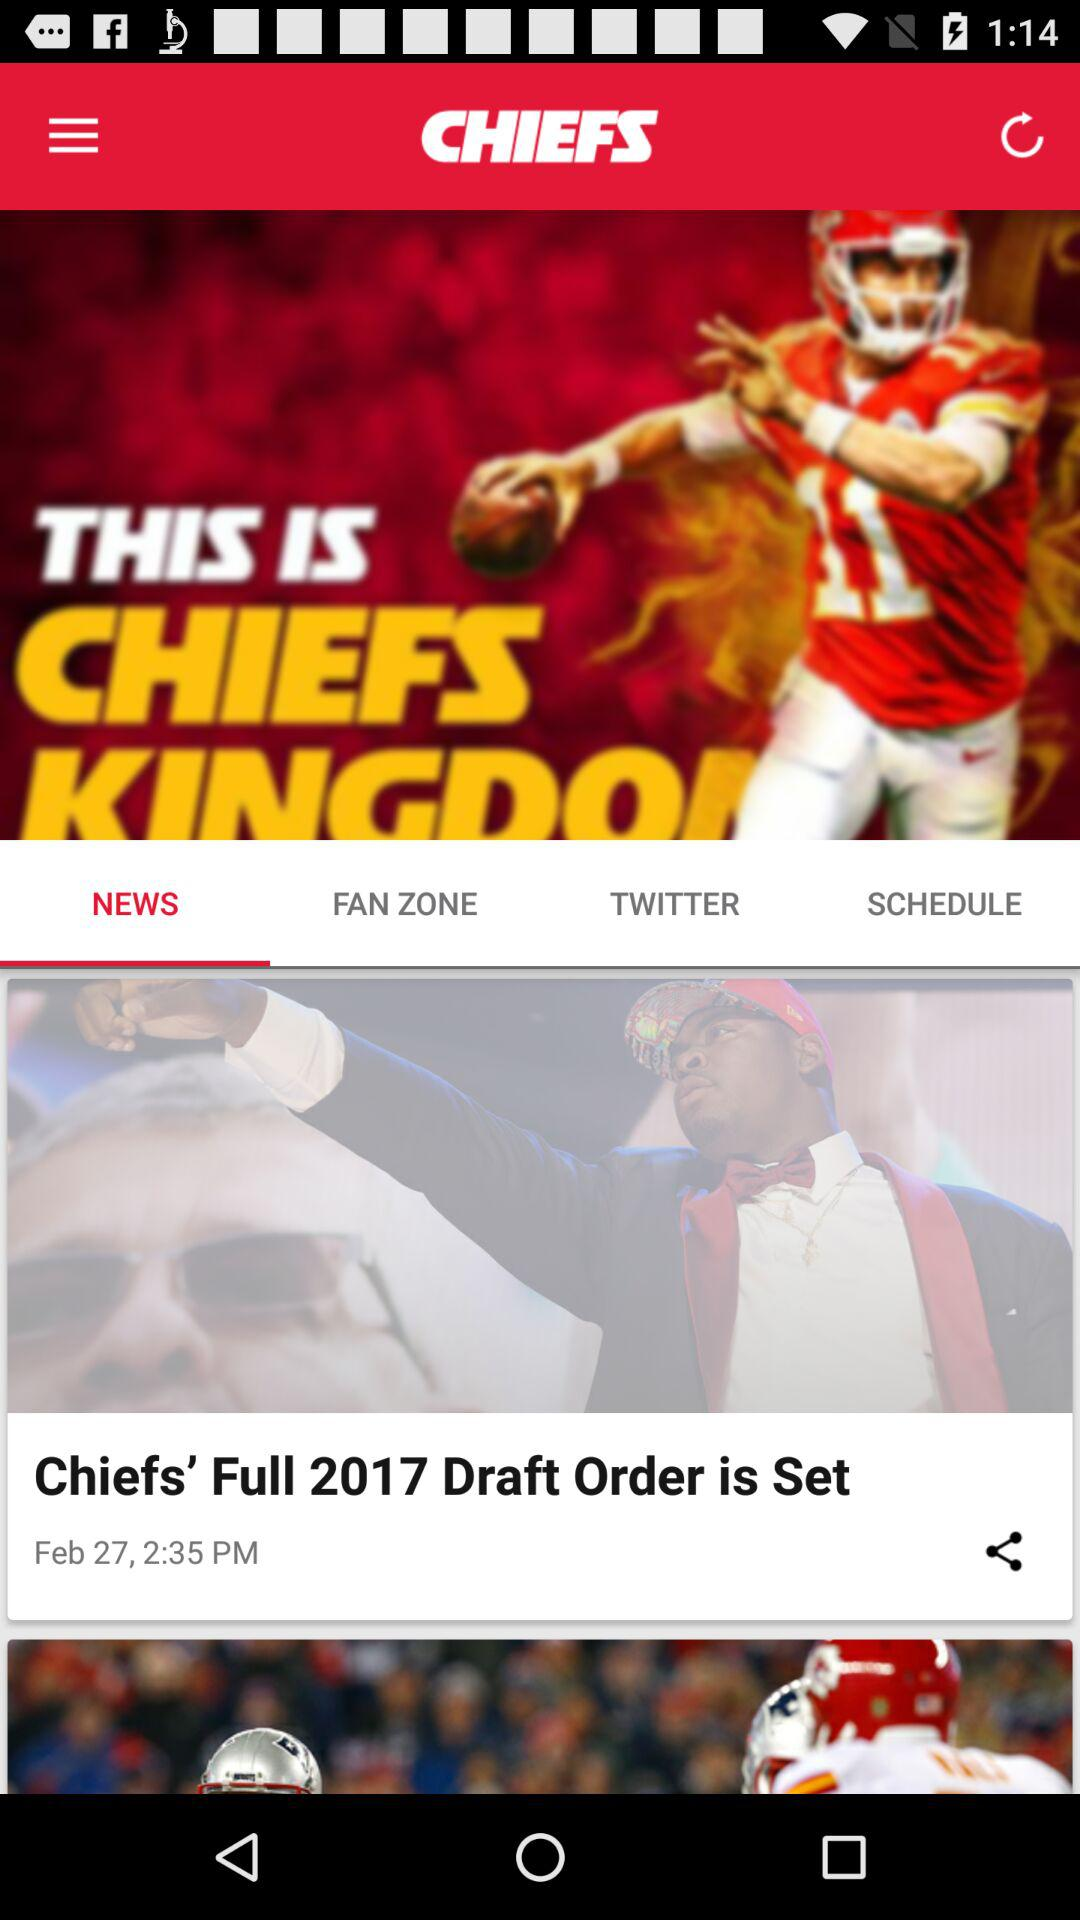

In [12]:
test_image

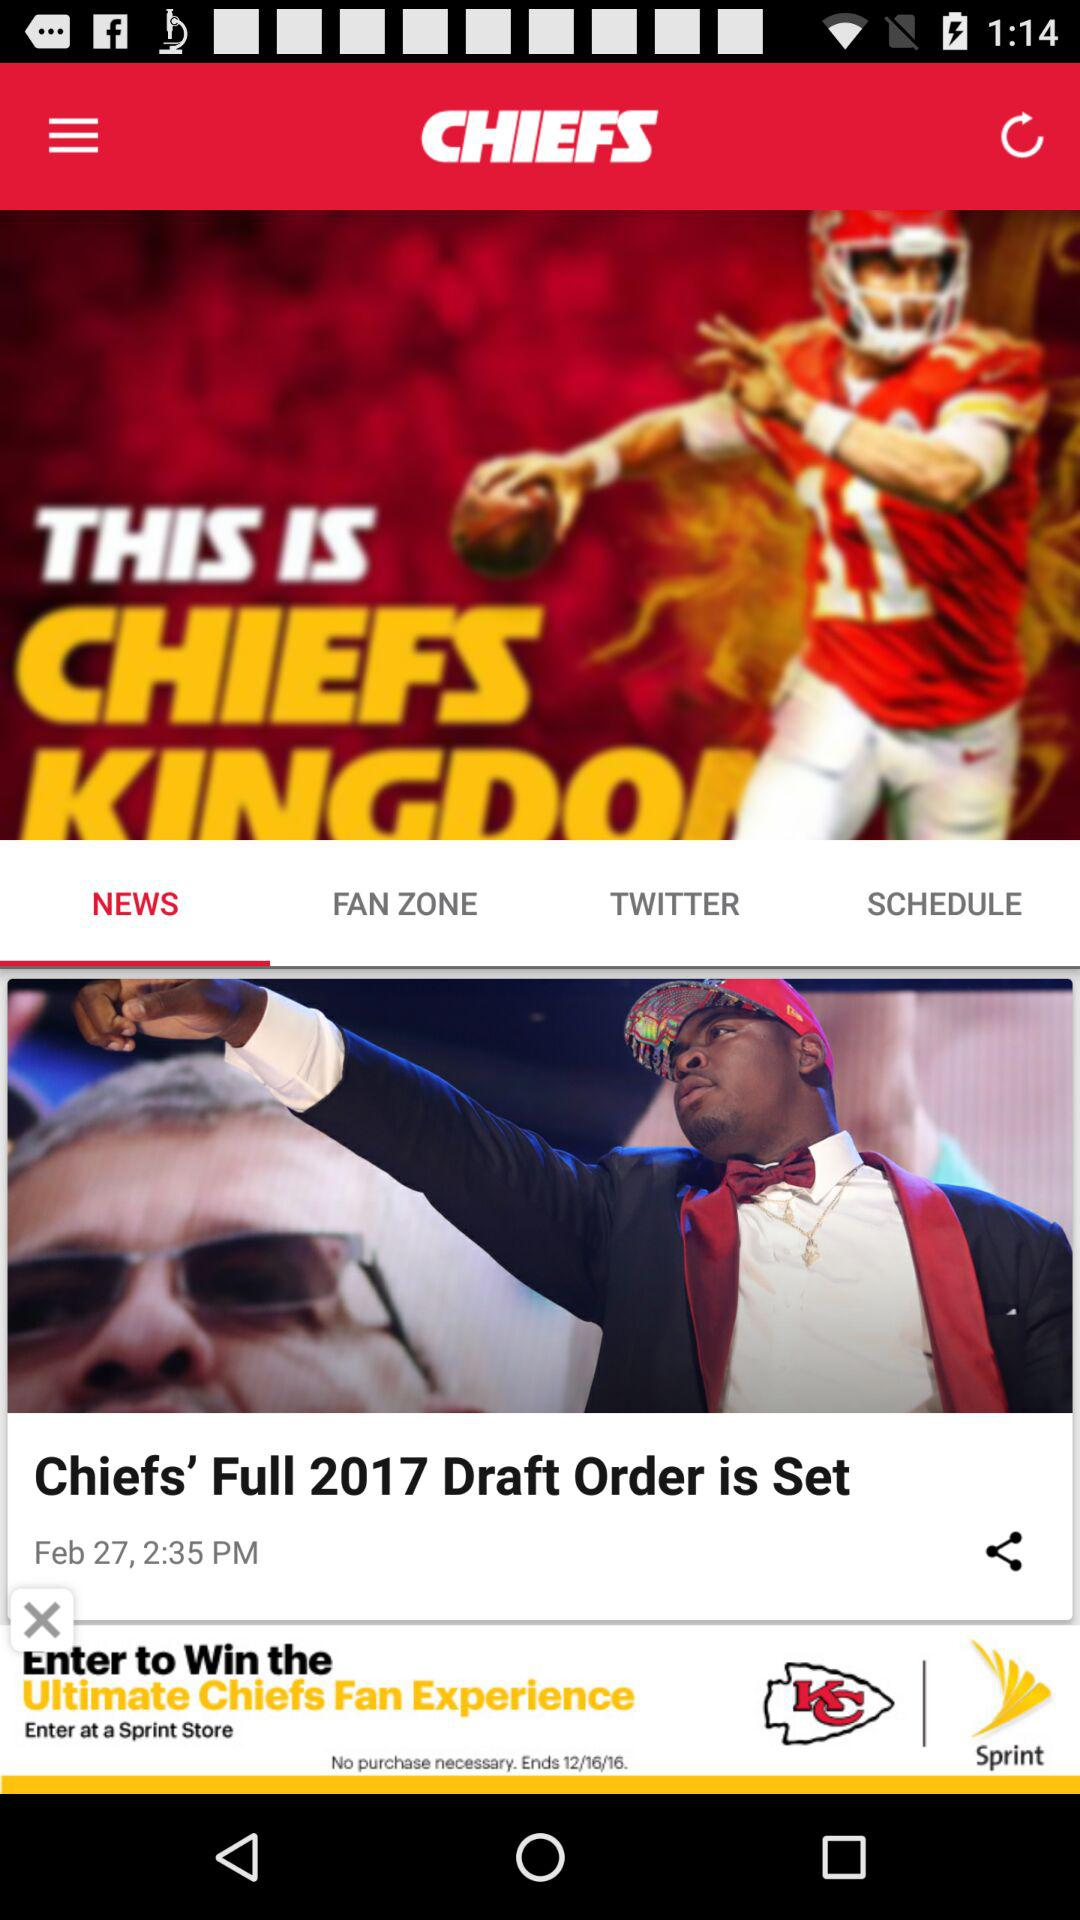

In [13]:
test_image_same

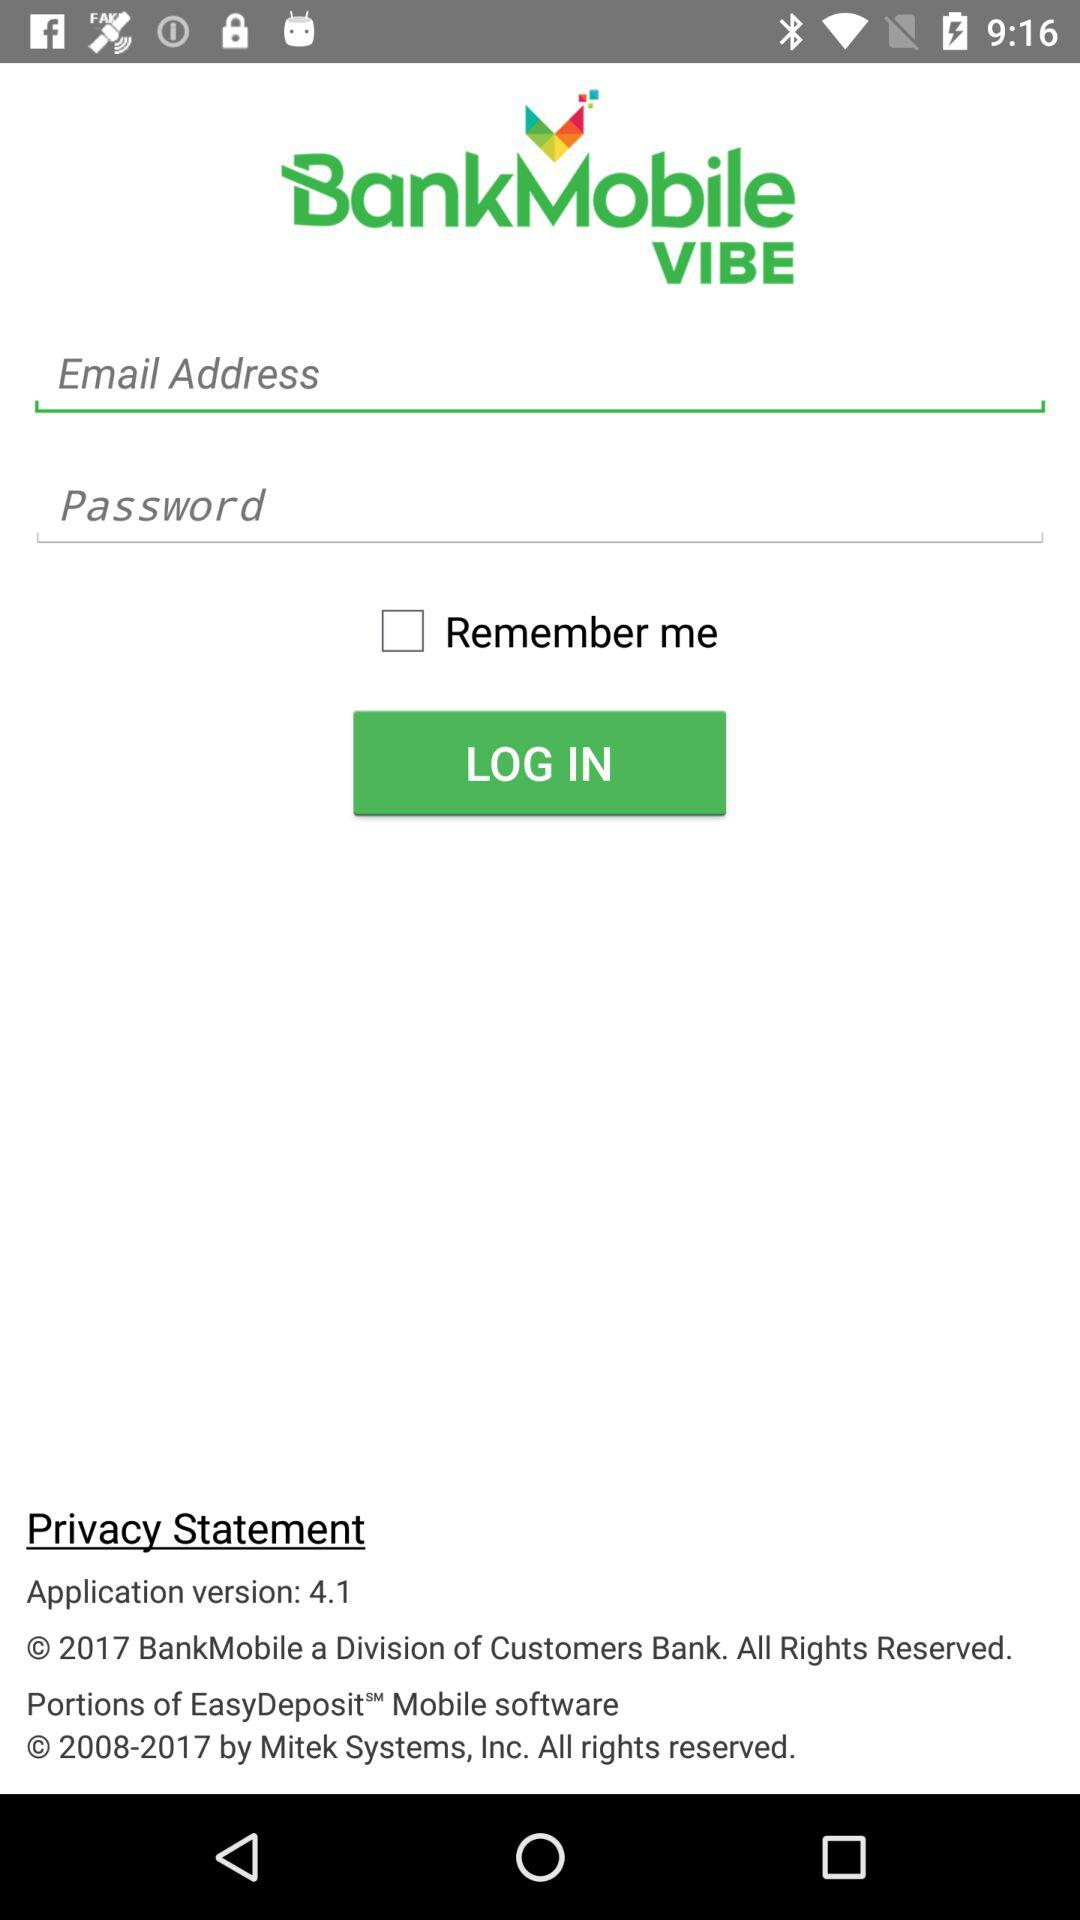

In [14]:
test_image_diff

In [15]:
model = loadModel()

Lightning automatically upgraded your loaded checkpoint from v1.6.0 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file downloads/checkpoints/screensim-resnet-web350k.ckpt`


In [16]:
embedding = getPredictionsForImage(model, test_image)

In [22]:
embedding_same = getPredictionsForImage(model, test_image_same)

In [26]:
embedding_diff = getPredictionsForImage(model, test_image_diff)

In [27]:
dist_same = torch.linalg.norm(embedding - embedding_same)

In [28]:
dist_diff = torch.linalg.norm(embedding - embedding_diff)

In [29]:
margin = (0.2 + 0.5) / 2 # this is an average of the margin_pos and margin_neg hyperparameters

In [30]:
print("same pair dist: {:.3f} same screen? ".format(float(dist_same)) + str((float(dist_same) < margin)))
print("diff pair dist: {:.3f} same screen? ".format(float(dist_diff)) + str((float(dist_diff) < margin)))

same pair dist: 0.230 same screen? True
diff pair dist: 0.524 same screen? False
